In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

#https://www.youtube.com/watch?v=3FwGDUD_ZuQ&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL&index=3

In [3]:
train_labels = []
train_samples = []

In [4]:
#generate the data
for i in range(50):
    #5% younger individuals who did experience side effect
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    #5% oldes individuals who did not experience side effect    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    #95% younger individuals who did not experience side effect
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    #95% oldes individuals who did experience side effect    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
#convert train samples and array into np array, shuffle labels and samples to avoid any possible order
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [6]:
#scale the train samples
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

2023-07-24 10:25:59.133593: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-24 10:25:59.414045: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-24 10:25:59.415731: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 10:26:00.387236: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
#sequential model
model = Sequential ([
    Dense(units=16, input_shape=(1,), activation='relu'), #1 hidden layer (shape of the input data), 16 neurons (arbitrary)
    Dense(units=32, activation ='relu'),
    Dense(units=2,  activation ='softmax') #output layer, 2 units, 2 possible output
])

2023-07-24 10:26:01.855173: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-24 10:26:01.855868: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
#type optimizer, loss, metrics
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
#how many samples are included in one batch to be pass and process into the network in one time, process all the data 30 times
model.fit(x = scaled_train_samples, y = train_labels, validation_split=0.1, batch_size = 10, epochs = 30, shuffle = True, verbose = 2)

Epoch 1/30
189/189 - 1s - loss: 0.6625 - accuracy: 0.5630 - val_loss: 0.6481 - val_accuracy: 0.6143 - 599ms/epoch - 3ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6379 - accuracy: 0.6354 - val_loss: 0.6192 - val_accuracy: 0.7238 - 115ms/epoch - 609us/step
Epoch 3/30
189/189 - 0s - loss: 0.6032 - accuracy: 0.7370 - val_loss: 0.5884 - val_accuracy: 0.7524 - 114ms/epoch - 604us/step
Epoch 4/30
189/189 - 0s - loss: 0.5706 - accuracy: 0.7794 - val_loss: 0.5586 - val_accuracy: 0.8000 - 116ms/epoch - 612us/step
Epoch 5/30
189/189 - 0s - loss: 0.5381 - accuracy: 0.8217 - val_loss: 0.5293 - val_accuracy: 0.8190 - 116ms/epoch - 613us/step
Epoch 6/30
189/189 - 0s - loss: 0.5059 - accuracy: 0.8471 - val_loss: 0.5011 - val_accuracy: 0.8476 - 115ms/epoch - 606us/step
Epoch 7/30
189/189 - 0s - loss: 0.4749 - accuracy: 0.8587 - val_loss: 0.4752 - val_accuracy: 0.8476 - 113ms/epoch - 596us/step
Epoch 8/30
189/189 - 0s - loss: 0.4456 - accuracy: 0.8762 - val_loss: 0.4512 - val_accuracy: 0.8619 - 115ms/epoch

Accuracy and val_accuracy as well as loss and val_loss are similar, the model is not overfitting, it performs well.
The model is generalizing well

## Process Test Data

In [12]:
test_labels = []
test_samples = []

In [13]:
#generate the test data
for i in range(50):
    #5% younger individuals who did experience side effect
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    #5% oldes individuals who did not experience side effect    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(1000):
    #95% younger individuals who did not experience side effect
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    #95% oldes individuals who did experience side effect    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [14]:
#convert train samples and array into np array, shuffle labels and samples to avoid any possible order
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [15]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## Predict

In [16]:
#x are the data that we want the model to predict on
predictions = model.predict(x = scaled_test_samples, batch_size = 10, verbose = 0)

In [17]:
for i in predictions:
    print(i)

[0.97270787 0.02729209]
[0.39948785 0.60051215]
[0.9342929  0.06570692]
[0.05727585 0.94272405]
[0.75463605 0.24536388]
[0.9342929  0.06570692]
[0.11129133 0.88870865]
[0.97470504 0.02529493]
[0.97398573 0.02601428]
[0.97470504 0.02529493]
[0.9493021  0.05069793]
[0.03783758 0.9621624 ]
[0.39948785 0.60051215]
[0.04800215 0.9519979 ]
[0.63800883 0.36199123]
[0.9737343 0.0262657]
[0.97458386 0.02541607]
[0.39948785 0.60051215]
[0.06823104 0.93176895]
[0.9737343 0.0262657]
[0.97270787 0.02729209]
[0.97517973 0.02482032]
[0.276006 0.723994]
[0.7279613  0.27203876]
[0.5372213 0.4627787]
[0.276006 0.723994]
[0.97425735 0.02574267]
[0.97352606 0.02647388]
[0.08796363 0.9120364 ]
[0.9752969  0.02470302]
[0.03160566 0.9683942 ]
[0.1257916 0.8742085]
[0.14191176 0.8580882 ]
[0.9748246  0.02517546]
[0.97106797 0.02893213]
[0.05727585 0.94272405]
[0.97494346 0.02505653]
[0.9726105  0.02738945]
[0.02482257 0.97517747]
[0.5024927  0.49750718]
[0.97425735 0.02574267]
[0.97458386 0.02541607]
[0.77948

[0.7279613  0.27203876]
[0.9544296  0.04557033]
[0.43329772 0.56670237]
[0.14191176 0.8580882 ]
[0.07287044 0.92712957]
[0.05401139 0.94598866]
[0.9726105  0.02738945]
[0.03356398 0.9664361 ]
[0.9544296  0.04557034]
[0.9149948  0.08500525]
[0.9726105  0.02738945]
[0.9740925  0.02590751]
[0.06436757 0.93563247]
[0.07944858 0.9205515 ]
[0.63800883 0.36199123]
[0.96886337 0.03113667]
[0.97392654 0.02607337]
[0.20069896 0.79930097]
[0.97178423 0.02821568]
[0.9733072  0.02669277]
[0.87638515 0.12361489]
[0.9149948  0.08500524]
[0.22395925 0.77604073]
[0.9342929  0.06570692]
[0.36660957 0.6333903 ]
[0.9739858  0.02601428]
[0.97506183 0.02493814]
[0.5024927  0.49750718]
[0.05727585 0.94272405]
[0.04016601 0.9598339 ]
[0.02975811 0.97024196]
[0.949302   0.05069793]
[0.87638515 0.12361489]
[0.9752969  0.02470302]
[0.11129133 0.88870865]
[0.39948785 0.60051215]
[0.04524088 0.95475906]
[0.3046672 0.6953329]
[0.04800215 0.9519979 ]
[0.17929646 0.8207035 ]
[0.03160566 0.9683943 ]
[0.9749435  0.0250

The output tells us the probability predicted not for experimenting side effects (0) and experimenting side effects (1)

In [18]:
#index of the prediction with higherst probability
rounded_predictions = np.argmax(predictions, axis = -1)

In [19]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
0
1
0
0
0
0
1
1
1
0
0
0
1
1
0
0
0
1
0
0
1
0
0
1
0
1
1
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
1
1
1
1
0
1
0
1
1
1
1
1
1
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
1
1
1
1
1
0
1
0
0
1
0
0
1
0
0
0
0
1
1
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
1
0
0
0
1
1
1
1
1
1
0
0
0
1
1
1
1
0
0
0
0
1
1
1
0
0
1
0
1
1
1
1
0
1
0
1
1
0
1
0
0
0
0
1
0
0
1
1
1
0
1
1
1
1
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
1
1
1
0
1
1
1
1
1
1
1
0
1
0
0
0
0
0
0
1
1
0
0
1
0
1
1
1
1
1
1
1
1
1
0
1
0
1
0
0
0
1
0
1
0
1
1
0
1
0
1
0
0
1
1
1
1
0
0
0
1
1
1
0
0
1
1
0
1
0
0
0
0
0
1
1
0
0
1
0
1
1
0
0
0
1
1
1
1
0
0
0
0
0
1
1
0
0
0
0
0
0
1
1
0
0
1
1
0
0
0
1
1
0
1
0
1
0
0
0
0
1
1
0
0
1
1
1
0
1
1
0
0
1
0
1
1
0
0
1
0
1
0
0
1
0
0
1
1
0
1
0
1
1
1
1
0
1
1
0
1
1
0
1
0
0
0
1
1
1
1
0
1
1
1
1
0
0
0
0
1
0
1
1
0
1
1
1
0
0
0
1
1
1
0
1
1
1
0
1
0
0
0
1
1
1
0
0
0
1
0
0
0
1
1
1
0
0
0
0
1
1
1
1
1
1
0
1
1
0
1
0
0
1
0
1
1
0
0
0
1
0
0
1
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
1
1
0
1
0
1
1
0
0
1
1
1
0
0
1
0
1
1
0
1
1
1
1
1
0
0
1
1
0
1
1
1
0
0
1
1
0
1
1
0
1
0


##  Confusion matrix

how well the model did?
we have the labels for the data that the model is inferring from

We can visualize the prediction result with a confusion matrix

In [20]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [21]:
cm = confusion_matrix(y_true = test_labels, y_pred = rounded_predictions)

In [22]:
#print and plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion matrix ', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized cm')
    else:
        print('Cm without normalization')
    print(cm)
    
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1]) ):
        plt.text(j,i,cm[i,j],
                horizontalalignment = 'center',
                color = 'white' if cm[i,j]>thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')  

Cm without normalization
[[ 985   65]
 [  48 1002]]


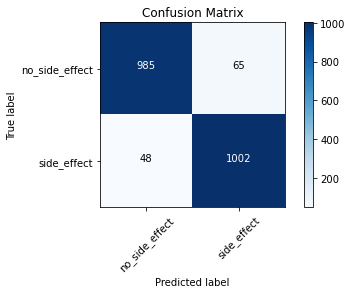

In [23]:
cm_plot_labels = ['no_side_effect', 'side_effect']
plot_confusion_matrix(cm = cm, classes=cm_plot_labels, title = 'Confusion Matrix')

## Save and Load a Model

### model.save()

In [24]:
#model saved to disk
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

/home/scampo/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


The save function saves:
- the architecture od rhw model, allowing ti re-create the model 
- the weights
- the train configuration (loss, optimizer)
- the state of the optimizer, allowing to resume training exactly where left off

In [27]:
#to create new model with the existing one
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [28]:
new_model.summary()
#replica of the original model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
new_model.get_weights()

[array([[-0.36259112,  0.25610232,  0.62273675, -0.37488335,  0.6477816 ,
         -0.3122471 ,  0.5884779 , -0.30663413,  0.4579598 , -0.08539909,
         -0.39663556,  0.49486393,  0.7218428 ,  0.06538558, -0.2245448 ,
          0.46090105]], dtype=float32),
 array([ 0.        , -0.08612063, -0.16354536,  0.        , -0.14926869,
         0.        , -0.13151577,  0.        , -0.12947388,  0.        ,
         0.        , -0.02904429, -0.16527395,  0.23028378,  0.        ,
         0.24608506], dtype=float32),
 array([[-1.26764908e-01,  1.23023450e-01,  2.03448921e-01,
         -2.59574771e-01, -2.51823187e-01, -8.47928822e-02,
          8.10992122e-02,  1.56830251e-02,  3.06494147e-01,
         -2.62537599e-01, -2.56496370e-01,  1.32258147e-01,
          2.44766802e-01,  2.85894960e-01, -2.36658841e-01,
         -2.65420109e-01, -3.31962138e-01, -1.87023103e-01,
         -9.15157199e-02,  8.77848864e-02,  3.21146935e-01,
         -1.52750790e-01,  8.56961608e-02, -2.57403791e-01,
 

In [32]:
new_model.optimizer

### model.to_json()

In [34]:
#json
json_string = model.to_json()
#yaml
#yaml_string = model.to_yaml()

In [35]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class

In [36]:
#model reconstruction from json
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# from yaml
#from tensorflow.keras.models import model_from_yaml
#model= model_from_yaml(yaml_string)

In [37]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### model.save_weights

In [38]:
import os.path
if os.path.isfile('models/model_weights.h5') is False:
    model.save_weights('models/model_weights.h5')

quando salvo i weights ma non il modello, devo comunque creare un secondo modello su cui applicare i weights salvati

In [39]:
model2 = Sequential ([
    Dense(units=16, input_shape=(1,), activation='relu'), 
    Dense(units=32, activation ='relu'),
    Dense(units=2,  activation ='softmax') 
])

In [40]:
model2.load_weights('models/model_weights.h5')

In [41]:
model2.get_weights()

[array([[-0.36259112,  0.25610232,  0.62273675, -0.37488335,  0.6477816 ,
         -0.3122471 ,  0.5884779 , -0.30663413,  0.4579598 , -0.08539909,
         -0.39663556,  0.49486393,  0.7218428 ,  0.06538558, -0.2245448 ,
          0.46090105]], dtype=float32),
 array([ 0.        , -0.08612063, -0.16354536,  0.        , -0.14926869,
         0.        , -0.13151577,  0.        , -0.12947388,  0.        ,
         0.        , -0.02904429, -0.16527395,  0.23028378,  0.        ,
         0.24608506], dtype=float32),
 array([[-1.26764908e-01,  1.23023450e-01,  2.03448921e-01,
         -2.59574771e-01, -2.51823187e-01, -8.47928822e-02,
          8.10992122e-02,  1.56830251e-02,  3.06494147e-01,
         -2.62537599e-01, -2.56496370e-01,  1.32258147e-01,
          2.44766802e-01,  2.85894960e-01, -2.36658841e-01,
         -2.65420109e-01, -3.31962138e-01, -1.87023103e-01,
         -9.15157199e-02,  8.77848864e-02,  3.21146935e-01,
         -1.52750790e-01,  8.56961608e-02, -2.57403791e-01,
 